# EDA With python on the retail dataset 

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

### Data Cleaning 



In [2]:
retail= pd.read_csv('Dummy Data HSS.csv')
retail.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


### 1.Continuous Data 
     Taking into account the null values 

In [3]:
retail.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

<AxesSubplot:>

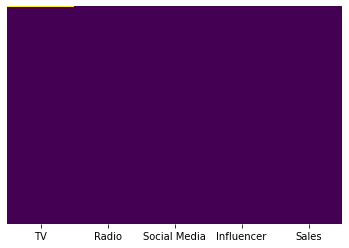

In [4]:
sns.heatmap(retail.isnull(), yticklabels= False, cbar= False, cmap='viridis')

As the missing data is Continuous in nature, we will fill in the average values in the null places 

In [5]:
retail=retail.fillna(retail.mean())
retail.isnull().sum()

TV              0
Radio           0
Social Media    0
Influencer      0
Sales           0
dtype: int64

### 2. Categorical Data 
  We will convert categorical data into numeric form using dummies 

In [6]:
retail = pd.get_dummies(retail)
retail.head()

,TV,Radio,Social Media,Sales,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano
0,16.0,6.566231,2.907983,54.732757,0,1,0,0
1,13.0,9.237765,2.409567,46.677897,0,1,0,0
2,41.0,15.886446,2.913410,150.177829,0,1,0,0
3,83.0,30.020028,6.922304,298.246340,0,1,0,0
4,15.0,8.437408,1.405998,56.594181,0,0,1,0


As sales is the dependent variable we will shift it to the end for better splitting and modelling 

In [7]:
retail=retail[['TV', 'Radio', 'Social Media', 'Influencer_Macro',
       'Influencer_Mega', 'Influencer_Micro', 'Influencer_Nano', 'Sales']]
retail.head()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
0,16.0,6.566231,2.907983,0,1,0,0,54.732757
1,13.0,9.237765,2.409567,0,1,0,0,46.677897
2,41.0,15.886446,2.913410,0,1,0,0,150.177829
3,83.0,30.020028,6.922304,0,1,0,0,298.246340
4,15.0,8.437408,1.405998,0,0,1,0,56.594181


In [8]:
#Seeing the correlation of data
retail.corr()

,TV,Radio,Social Media,Influencer_Macro,Influencer_Mega,Influencer_Micro,Influencer_Nano,Sales
TV,1.000000,0.866885,0.527010,0.021335,-0.012630,-0.004863,-0.003645,0.996652
Radio,0.866885,1.000000,0.606793,0.009518,-0.005071,0.004212,-0.008601,0.867369
Social Media,0.527010,0.606793,1.000000,0.011631,0.013072,-0.013312,-0.011351,0.528121
Influencer_Macro,0.021335,0.009518,0.011631,1.000000,-0.332131,-0.331171,-0.328482,0.019267
Influencer_Mega,-0.012630,-0.005071,0.013072,-0.332131,1.000000,-0.338211,-0.335465,-0.011701
Influencer_Micro,-0.004863,0.004212,-0.013312,-0.331171,-0.338211,1.000000,-0.334495,-0.004099
Influencer_Nano,-0.003645,-0.008601,-0.011351,-0.328482,-0.335465,-0.334495,1.000000,-0.003289
Sales,0.996652,0.867369,0.528121,0.019267,-0.011701,-0.004099,-0.003289,1.000000


## Splitting the data 


In [9]:
from sklearn.model_selection import train_test_split
x = retail.iloc[:,0:-1].values
y = retail.iloc[:,-1:].values

### Distributing the dataset into 3 parts test, train and validation set 

In [10]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.4, random_state=42)
x_train, x_val, y_train, y_val=train_test_split(x_train,y_train, test_size=0.5, random_state=42)

In [11]:
print(len(x_train), len(x_test), len(x_val))

1371 1829 1372


# Analysis 

In [12]:
import joblib 

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import GridSearchCV
from time import time
import warnings 
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)



In [13]:
#statement to refine the hyperparameter, prints out the avg accuracy score of the hyperpara
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))
          
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
          print('{}(+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

## Linear Regression


In [14]:
lr = LinearRegression()
lr.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [15]:
lr.fit(x_train, y_train)
# after training the data, perform prediction:

LinearRegression()

In [16]:
#y_pred_lr = lr.predict(x_test) # this is the prediction 

# evaluate the r2_score and RMSE between prediction and real data

#print(r2_score(y_test, y_pred_lr))
#print(mse(y_test, y_pred_lr)**0.5)
print(lr.coef_, lr.intercept_)

[[ 3.55648020e+00 -1.93602290e-03 -3.29185533e-02  4.38361831e-02
   4.62229036e-01 -1.36723997e-01 -3.69341222e-01]] [0.44202493]


In [17]:
joblib.dump(lr, 'LR_model.pkl')

['LR_model.pkl']

## Random Forest Regerssor

In [18]:
rf=RandomForestRegressor()
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [19]:
parameters = {
    'n_estimators' : [5, 50, 250],
    'max_depth' : [2, 4, 8, 16, 32, None]
}

cv= GridSearchCV(rf, parameters, cv=5)
cv.fit(x_train, y_train.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.941(+/-0.009) for {'max_depth': 2, 'n_estimators': 5}
0.943(+/-0.01) for {'max_depth': 2, 'n_estimators': 50}
0.943(+/-0.01) for {'max_depth': 2, 'n_estimators': 250}
0.994(+/-0.008) for {'max_depth': 4, 'n_estimators': 5}
0.995(+/-0.007) for {'max_depth': 4, 'n_estimators': 50}
0.995(+/-0.008) for {'max_depth': 4, 'n_estimators': 250}
0.995(+/-0.007) for {'max_depth': 8, 'n_estimators': 5}
0.996(+/-0.007) for {'max_depth': 8, 'n_estimators': 50}
0.996(+/-0.007) for {'max_depth': 8, 'n_estimators': 250}
0.994(+/-0.009) for {'max_depth': 16, 'n_estimators': 5}
0.996(+/-0.007) for {'max_depth': 16, 'n_estimators': 50}
0.996(+/-0.007) for {'max_depth': 16, 'n_estimators': 250}
0.995(+/-0.007) for {'max_depth': 32, 'n_estimators': 5}
0.996(+/-0.007) for {'max_depth': 32, 'n_estimators': 50}
0.996(+/-0.007) for {'max_depth': 32, 'n_estimators': 250}
0.995(+/-0.007) for {'max_depth': None, 'n_estimators': 5}
0.996(+/-0.007) for {'max_dept

In [20]:
joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

## Decision Tree 

In [21]:
dt= DecisionTreeRegressor()
dt.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [22]:
parameters = {
    'max_depth' : [2, 4, 8, 16, 32, None]
}

cv= GridSearchCV(dt, parameters, cv=5)
cv.fit(x_train, y_train.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': None}

0.933(+/-0.01) for {'max_depth': 2}
0.992(+/-0.007) for {'max_depth': 4}
0.994(+/-0.007) for {'max_depth': 8}
0.993(+/-0.011) for {'max_depth': 16}
0.993(+/-0.011) for {'max_depth': 32}
0.995(+/-0.008) for {'max_depth': None}


In [23]:
joblib.dump(cv.best_estimator_, 'DT_model.pkl')

['DT_model.pkl']

## Support Vector Regressor 
 SVR requires feature sacaling for which we would be using Standard Scaler 

In [24]:
a = retail.iloc[:,0:-1].values
b = retail.iloc[:,-1:].values

# reshape b

b = b.reshape(len(b), 1)

In [25]:
# now we split to train and test

a_train, a_test, b_train, b_test = train_test_split(a, b,test_size=0.4, random_state=42)
a_train, a_val, b_train, b_val=train_test_split(a_train,b_train, test_size=0.5, random_state=42)

In [26]:
# now perform scaling

scala = StandardScaler()
scalb = StandardScaler()

a_train = scala.fit_transform(a_train)
b_train = scalb.fit_transform(b_train)

In [27]:
sv = SVR()
sv.get_params().keys()


dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [28]:
parameters={
    'kernel' : ['linear', 'rbf'],
    'C' :[0.1,1,10]
}
cv=GridSearchCV(sv, parameters, cv=5)
cv.fit(a_train, b_train.ravel())

print_results(cv)

BEST PARAMS: {'C': 1, 'kernel': 'linear'}

0.996(+/-0.007) for {'C': 0.1, 'kernel': 'linear'}
0.982(+/-0.009) for {'C': 0.1, 'kernel': 'rbf'}
0.996(+/-0.007) for {'C': 1, 'kernel': 'linear'}
0.993(+/-0.008) for {'C': 1, 'kernel': 'rbf'}
0.996(+/-0.007) for {'C': 10, 'kernel': 'linear'}
0.994(+/-0.008) for {'C': 10, 'kernel': 'rbf'}


In [29]:
joblib.dump(cv.best_estimator_, 'SVR_model.pkl')

['SVR_model.pkl']

## Polynomial Regressor

In [30]:
poly = PolynomialFeatures()
po_regressor = LinearRegression()
po_regressor.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

In [31]:
po_regressor.fit(poly.fit_transform(x_train), y_train)
print(po_regressor.coef_, po_regressor.intercept_)

[[-5.19894441e-14  2.82435725e+00  1.45507725e-02 -5.38101171e-02
  -1.29793801e-01  5.12608710e-01 -1.72212224e-01 -2.10602685e-01
   2.89349224e-04  5.85712168e-04 -4.69941543e-03  7.26383695e-01
   6.65166461e-01  7.04172141e-01  7.28634957e-01 -2.00531686e-03
   6.38738244e-03 -4.31560045e-02  1.17106812e-01  2.69521348e-03
  -6.20952482e-02  2.25652951e-02  3.66687619e-03 -1.40089475e-01
   8.70432982e-02 -4.43081674e-03 -1.29793801e-01  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.12608710e-01  0.00000000e+00
   0.00000000e+00 -1.72212224e-01  0.00000000e+00 -2.10602685e-01]] [0.84710486]


In [32]:
joblib.dump(po_regressor, 'Polynomial_model.pkl')

['Polynomial_model.pkl']

# Evaluating Various Models

In [33]:
models = {}

for mdl in [ 'LR','RF', 'DT', 'SVR','Polynomial']:
    #the {} helps in formatting the string to add the name instead, pretty witty
    models[mdl] = joblib.load('{}_model.pkl.'.format(mdl))


In [34]:
models

{'LR': LinearRegression(),
 'RF': RandomForestRegressor(max_depth=8, n_estimators=250),
 'DT': DecisionTreeRegressor(),
 'SVR': SVR(C=1, kernel='linear'),
 'Polynomial': LinearRegression()}

In [39]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    r2 = round(r2_score(labels, pred), 3)
    mean2 = round(mse(labels, pred),3)
    print('{} -- R2 Score: {} / Mean squared Error: {} / Latency: {}ms'.format(name,r2,mean2**0.5,round((end-start),3)))
    

In [40]:
count=1
for name, mdl in models.items():
    if count==4:
        evaluate_model(name, mdl, a_val, b_val)
    elif count==5:
        evaluate_model(name, mdl, poly.fit_transform(x_val), y_val)
    else:
        evaluate_model(name, mdl, x_val, y_val)
    count=count+1

LR -- R2 Score: 0.993 / Mean squared Error: 8.092094907995087 / Latency: 0.001ms
RF -- R2 Score: 0.994 / Mean squared Error: 7.304039977984786 / Latency: 0.1ms
DT -- R2 Score: 0.992 / Mean squared Error: 8.538091121556388 / Latency: 0.001ms
SVR -- R2 Score: -1.805 / Mean squared Error: 156.83629363128932 / Latency: 0.001ms
Polynomial -- R2 Score: 0.993 / Mean squared Error: 8.083563570604241 / Latency: 0.001ms


## Decision Tree seems to be the Best model for the problem 

In [41]:
evaluate_model('Random Forest ', models['RF'], x_test, y_test)

Random Forest  -- R2 Score: 0.99 / Mean squared Error: 9.398936110007345 / Latency: 0.105ms
